<a href="https://colab.research.google.com/github/prajwalah28/Coursera/blob/main/dfrauds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
# loading of data
data=pd.read_csv('Fraud.csv')


In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Basic Checks


In [7]:
# prints first 5 rows of the data
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
# prints last5 rows of the data
data.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
97220,10,PAYMENT,17011.46,C1283088834,0.0,0.0,M485693121,0.0,0.0,0.0,0.0
97221,10,PAYMENT,1680.50,C671281,0.0,0.0,M661110294,0.0,0.0,0.0,0.0
97222,10,PAYMENT,26450.83,C948744009,0.0,0.0,M1020130183,0.0,0.0,0.0,0.0
97223,10,PAYMENT,12171.47,C1843902873,0.0,0.0,M2011839805,0.0,0.0,0.0,0.0
97224,10,PAYMENT,6733.59,C708911726,0.0,0.0,M2034482538,0.0,NaN,NaN,NaN


In [9]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,97225.000000,9.722500e+04,9.722500e+04,9.722500e+04,9.722500e+04,9.722400e+04,97224.000000,97224.0
mean,8.456817,1.724217e+05,8.793150e+05,8.956148e+05,8.792683e+05,1.182315e+06,0.001173,0.0
std,1.833480,3.419651e+05,2.689865e+06,2.727826e+06,2.403354e+06,2.802840e+06,0.034223,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.893120e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.208135e+04,1.994700e+04,0.000000e+00,2.080800e+04,4.894480e+04,0.000000,0.0
75%,10.000000,2.103607e+05,1.863453e+05,2.107046e+05,5.853365e+05,1.051531e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.397234e+07,1.000000,0.0


In [10]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            97225 non-null  int64  
 1   type            97225 non-null  object 
 2   amount          97225 non-null  float64
 3   nameOrig        97225 non-null  object 
 4   oldbalanceOrg   97225 non-null  float64
 5   newbalanceOrig  97225 non-null  float64
 6   nameDest        97225 non-null  object 
 7   oldbalanceDest  97225 non-null  float64
 8   newbalanceDest  97224 non-null  float64
 9   isFraud         97224 non-null  float64
 10  isFlaggedFraud  97224 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.2+ MB


In [11]:
# it shows the number columns and rows that data consists
data.shape

(97225, 11)

Domain Analysis


In [12]:
# displays all the columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Data Preprocessing
1. Data cleaning including missing values, outliers.

In [13]:
data.isnull().values.any()

True

In [14]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [15]:
## detect missing values in the given series object. 
## It return a boolean same-sized object indicating if the values are NA. 
## Missing values gets mapped to True and non-missing value gets mapped to False 
data.isna().any()


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest     True
isFraud            True
isFlaggedFraud     True
dtype: bool

In [16]:
data.type.value_counts()

PAYMENT     38478
CASH_OUT    29839
CASH_IN     19561
TRANSFER     8371
DEBIT         976
Name: type, dtype: int64

In [17]:
data.isFraud.value_counts()


0.0    97110
1.0      114
Name: isFraud, dtype: int64

In [18]:
data.isFlaggedFraud.value_counts()

0.0    97224
Name: isFlaggedFraud, dtype: int64

In [19]:
dfisFraud = data.loc[data.isFraud == 1]
dfisFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1.0,0.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1.0,0.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1.0,0.0


In [20]:
dataflagfraud= data.loc[data.isFlaggedFraud == 1]
dataflagfraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [21]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


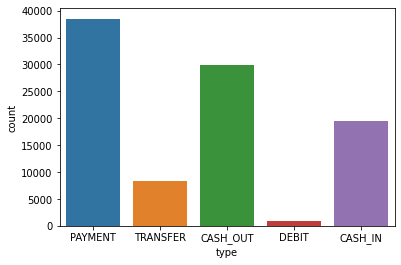

In [22]:
sns.countplot(data.type) ## for discrete data
